<a href="https://colab.research.google.com/github/hwansoo1981/ai/blob/master/GroupA_PowerGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Input
1. on-line(Google)
2. Application
3. Technical Lecture, Group study case

- Process
1. Planning (Tasks-what?, schedule-where?, assignment-who?, methodology-how?)
2. Model design
3. Data
4. Modify / revise data (GDP/Capital)

- Output
1. Problem definition
2. AI intro. / example / usage
3. AI solution for 1
4. Data description / Basic statistics
5. Program / Source Code

In [0]:
import pandas as pd    # pandas for data sheet
import numpy as np    # numpy for numerical computation
import matplotlib.pyplot as plt    # draw for plot
import seaborn as sns                  # draw for plot
from matplotlib import rcParams # draw for plot
import scipy.stats as st     # scipy for scientific computation
import itertools                 # itertools for iteration preprocessing

In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y.%m.%d')

# For Google Drive
#df_pg = pd.read_csv("https://drive.google.com/uc?export=download&id=1R8N2_7ggwzttLtyLqCrf2ng4HeQ7BlHs", parse_dates=['date'], index_col='date',date_parser=dateparse)

# For Github
df_pg = pd.read_csv("https://raw.githubusercontent.com/tgjeon/kings/master/data-01-powergrid.csv", parse_dates=['date'], index_col='date',date_parser=dateparse)


In [0]:
print(df_pg.shape)
print(df_pg.nunique())

(265, 7)
total                263
industry             262
transport            111
home                 257
commercial           264
public               246
income_per_capita     23
dtype: int64


In [0]:
print(df_pg.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1997-01-01 to 2019-01-01
Data columns (total 7 columns):
total                265 non-null int64
industry             265 non-null int64
transport            265 non-null int64
home                 265 non-null int64
commercial           265 non-null int64
public               265 non-null int64
income_per_capita    265 non-null float64
dtypes: float64(1), int64(6)
memory usage: 16.6 KB
None


In [0]:
df_pg.head()

,total,industry,transport,home,commercial,public,income_per_capita
date,,,,,,,
1997-01-01,16225,9237,161,2814,3050,964,12131.8747
1997-02-01,15364,8465,160,2788,2985,965,12131.8747
1997-03-01,16094,9677,140,2555,2793,929,12131.8747
1997-04-01,16266,9651,141,2629,2888,957,12131.8747
1997-05-01,16028,9658,133,2525,2797,916,12131.8747


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time series data for power consumption')

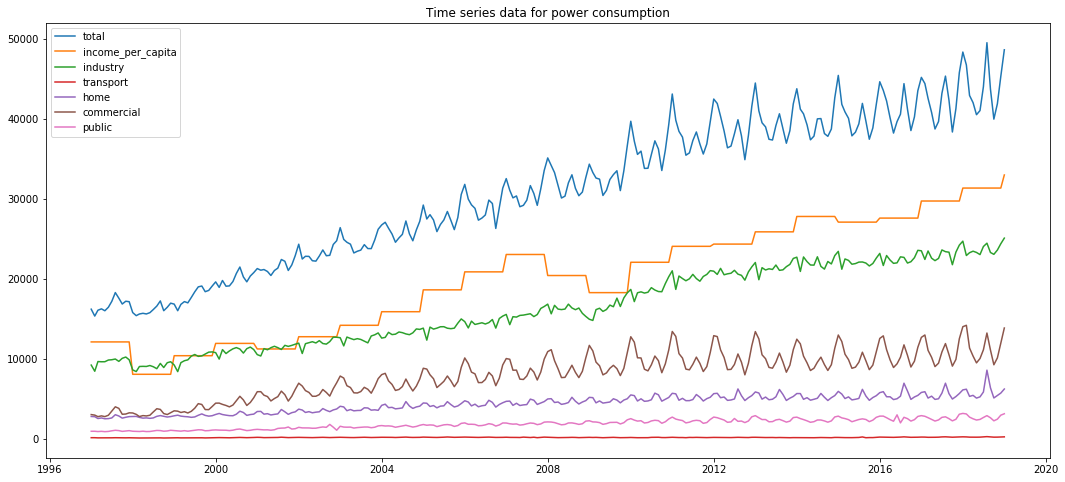

In [0]:
plt.figure(figsize=(18,8))
plt.plot(df_pg['total'])
plt.plot(df_pg['income_per_capita'])
plt.plot(df_pg['industry'])
plt.plot(df_pg['transport'])
plt.plot(df_pg['home'])
plt.plot(df_pg['commercial'])
plt.plot(df_pg['public'])

plt.legend()
plt.title('Time series data for power consumption')

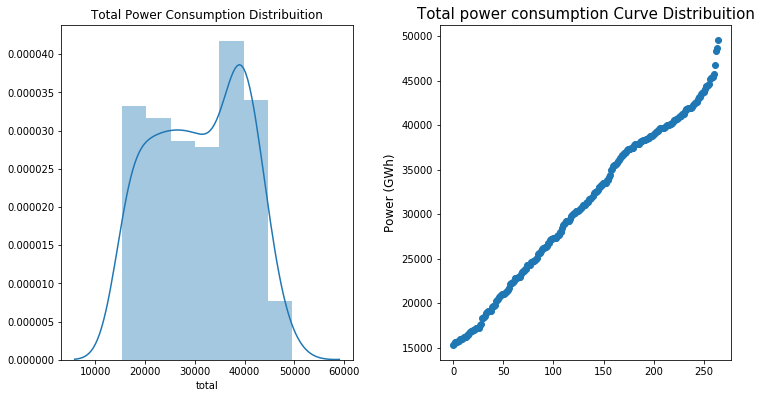

In [0]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Total Power Consumption Distribuition')
sns.distplot(df_pg['total'])

plt.subplot(122)
g1 = plt.scatter(range(df_pg.shape[0]), np.sort(df_pg.total.values))
g1 = plt.title("Total power consumption Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Power (GWh)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()


In [0]:
print("Total Min")
print(df_pg['total'].min())
print("Total Mean")
print(df_pg['total'].mean())
print("Total Median")
print(df_pg['total'].median())
print("Total Max")
print(df_pg['total'].max())
print("Total Std")
print(df_pg['total'].std())

Total Min
15364
Total Mean
30908.15849056604
Total Median
31089.0
Total Max
49532
Total Std
9097.490017928063


<Figure size 576x360 with 0 Axes>

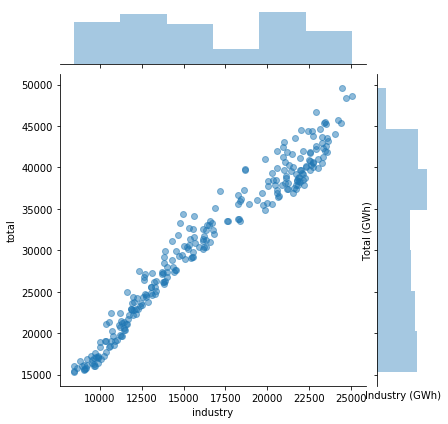

In [0]:
plt.figure(figsize = (8, 5))
sns.jointplot(df_pg.industry, df_pg.total, 
              alpha = 0.5)
plt.xlabel('Industry (GWh)')
plt.ylabel('Total (GWh)')
plt.show()

# Correlation Matrix

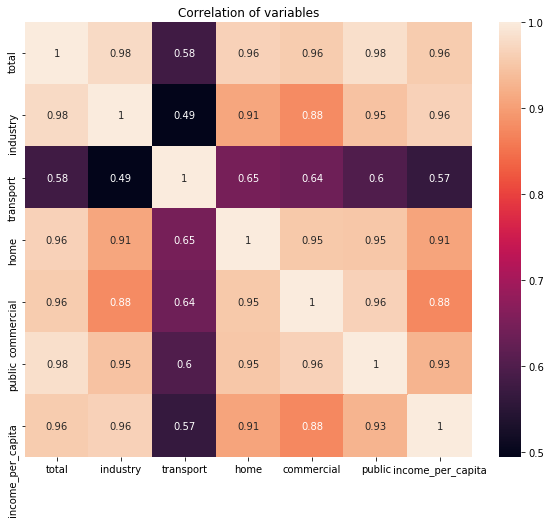

In [0]:
corr = df_pg[['total', 'industry', 'transport', 'home', 'commercial', 'public', 'income_per_capita']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

In [0]:
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, TimeSeriesSplit # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [0]:
num_samples = df_pg.shape[0]
window_size = 12 
num_splits = num_samples - window_size

print (num_samples, num_splits)
tss = TimeSeriesSplit(n_splits=num_splits, max_train_size=1)


265 253


In [0]:
X = df_pg.drop("total" ,axis=1).values
y = df_pg["total"].values

X_train = []
X_test = []
y_train = []
y_test = []

for train_index, test_index in tss.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_loopback = []
  X_test_loopback = []
  for i in range(1, window_size):
    X_train_loopback.append(X[train_index - i].reshape(-1))
    X_test_loopback.append(X[test_index - i].reshape(-1))
    
  
  X_train.append(np.concatenate(X_train_loopback).ravel())
  y_train.append(y[train_index].reshape(-1))
  X_test.append(np.concatenate(X_test_loopback).ravel())
  y_test.append(y[test_index].reshape(-1))

TRAIN: [11] TEST: [12]
TRAIN: [12] TEST: [13]
TRAIN: [13] TEST: [14]
TRAIN: [14] TEST: [15]
TRAIN: [15] TEST: [16]
TRAIN: [16] TEST: [17]
TRAIN: [17] TEST: [18]
TRAIN: [18] TEST: [19]
TRAIN: [19] TEST: [20]
TRAIN: [20] TEST: [21]
TRAIN: [21] TEST: [22]
TRAIN: [22] TEST: [23]
TRAIN: [23] TEST: [24]
TRAIN: [24] TEST: [25]
TRAIN: [25] TEST: [26]
TRAIN: [26] TEST: [27]
TRAIN: [27] TEST: [28]
TRAIN: [28] TEST: [29]
TRAIN: [29] TEST: [30]
TRAIN: [30] TEST: [31]
TRAIN: [31] TEST: [32]
TRAIN: [32] TEST: [33]
TRAIN: [33] TEST: [34]
TRAIN: [34] TEST: [35]
TRAIN: [35] TEST: [36]
TRAIN: [36] TEST: [37]
TRAIN: [37] TEST: [38]
TRAIN: [38] TEST: [39]
TRAIN: [39] TEST: [40]
TRAIN: [40] TEST: [41]
TRAIN: [41] TEST: [42]
TRAIN: [42] TEST: [43]
TRAIN: [43] TEST: [44]
TRAIN: [44] TEST: [45]
TRAIN: [45] TEST: [46]
TRAIN: [46] TEST: [47]
TRAIN: [47] TEST: [48]
TRAIN: [48] TEST: [49]
TRAIN: [49] TEST: [50]
TRAIN: [50] TEST: [51]
TRAIN: [51] TEST: [52]
TRAIN: [52] TEST: [53]
TRAIN: [53] TEST: [54]
TRAIN: [54]

In [0]:
print (X_train[13], y_train[13])

[9657.        142.       2801.       3288.       1088.       8085.323528
 9531.        129.       2744.       3055.       1003.       8085.323528
 8931.        123.       2832.       3175.        972.       8085.323528
 9444.        140.       2925.       3695.       1051.       8085.323528
 8788.        139.       2831.       3783.       1069.       8085.323528
 9032.        128.       2632.       3378.       1007.       8085.323528
 9182.        123.       2579.       2964.        938.       8085.323528
 9064.        119.       2637.       2879.        928.       8085.323528
 9079.        128.       2605.       2923.        974.       8085.323528
 9060.        124.       2700.       2803.        936.       8085.323528
 8426.        144.       2821.       3078.        947.       8085.323528] [16858]


In [0]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

[02:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

In [0]:
#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

Scaled_Ridge: 0.804703 (+/- 0.087221)
Scaled_Lasso: 0.304371 (+/- 0.314602)
Scaled_Elastic: 0.505437 (+/- 0.107870)
Scaled_SVR: 0.743758 (+/- 0.081366)
Scaled_RF_reg: -0.624624 (+/- 1.033006)
Scaled_ET_reg: -1.866578 (+/- 2.874419)
Scaled_BR_reg: -0.679172 (+/- 1.336862)
Scaled_Hub-Reg: 0.783792 (+/- 0.116932)
Scaled_BayRidge: 0.802488 (+/- 0.088624)
Scaled_XGB_reg: -0.182950 (+/- 1.012616)
Scaled_DT_reg: -3.338342 (+/- 2.978705)
Scaled_KNN_reg: -1.091803 (+/- 1.330735)
Scaled_Gboost-Reg: -0.149365 (+/- 1.098833)
Scaled_RFR_PCA: -3.905353 (+/- 2.215635)
Scaled_XGBR_PCA: -3.812115 (+/- 2.991047)


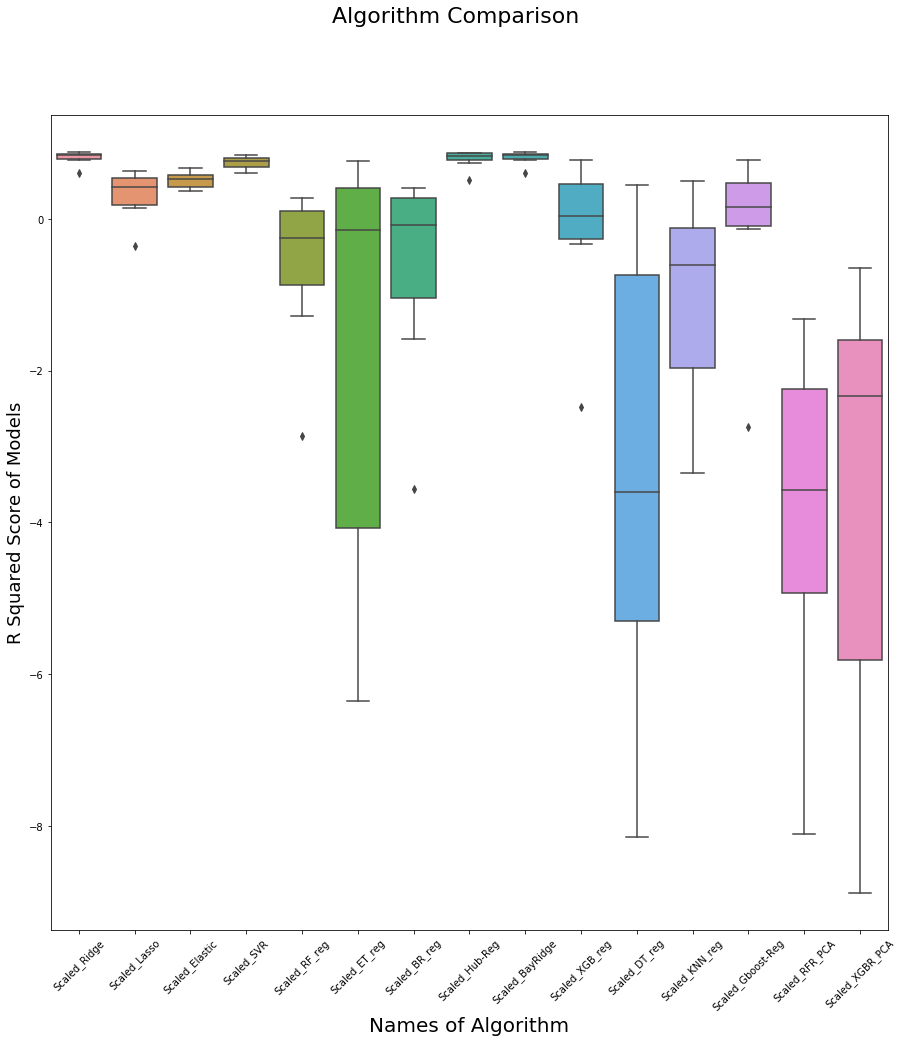

In [0]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,15))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Names of Algorithm", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# Testing the best models

In [0]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [0]:
xgb.fit(X_train, y_train)

[02:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [0]:
y_hat = xgb.predict(X_test)
xgb.score(X_test,y_test)

0.9997106984114963

## Randomized Search in RandomForest Regressor


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## Using Random Search to find the best Hyper Paramns

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   59.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
#Knowning the best params
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 157}

In [0]:
# Predicting with best params
y_hat_Search = rf_random.predict(X_test)

In [0]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.9997
RandomForest Regressor Prediction R2-score: 0.9963

MSE of XGBoost Regressor: 45.7724609375
MSE of RandomForest Regressor: 266.6410356981942 


### [END_OF_FILE]